<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### For the "Median value of owner-occupied homes" provide a boxplot


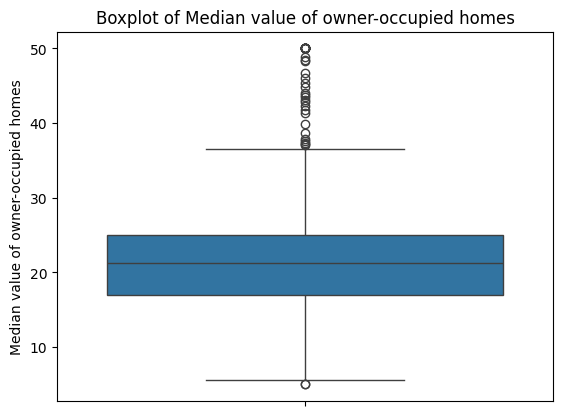

In [9]:
sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median value of owner-occupied homes')
pyplot.ylabel('Median value of owner-occupied homes')
pyplot.show()

The boxplot shows that the median value of owner-occupied homes is typically around 22.5, with a moderate spread in the middle 50% of values. There are a number of homes with considerably higher median values that are identified as outliers, suggesting a potential right skew in the distribution.


#### Provide a  bar plot for the Charles river variable


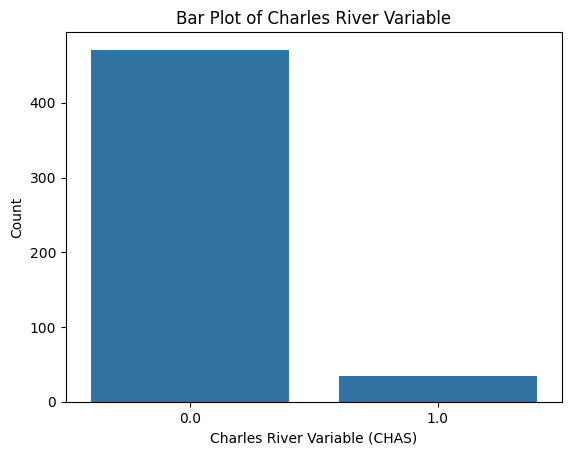

In [10]:
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Charles River Variable (CHAS)')
pyplot.ylabel('Count')
pyplot.show()

This bar chart indicates that in this Boston housing dataset, a large majority of the census tracts do not bound the Charles River (CHAS = 0), while only a small proportion of tracts do bound the river (CHAS = 1).  The variable is heavily skewed towards the category 0.0.


#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


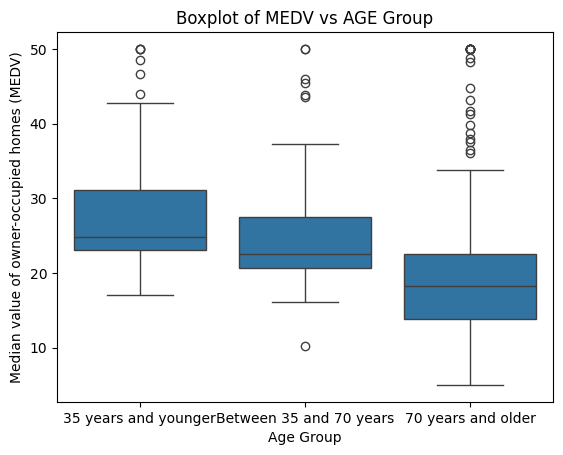

In [11]:
# Discretize the AGE variable
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

# Create the boxplot
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs AGE Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median value of owner-occupied homes (MEDV)')
pyplot.show()

This boxplot suggests a general tendency for the median value of owner-occupied homes to decrease as the age of the housing units increases. Homes in the "35 years and younger" age group tend to have the highest median values, while homes "70 years and older" tend to have the lowest. However, within each age group, there's a considerable spread in home values, and there are outliers, particularly on the higher end, indicating the presence of some very expensive homes regardless of age group.


#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


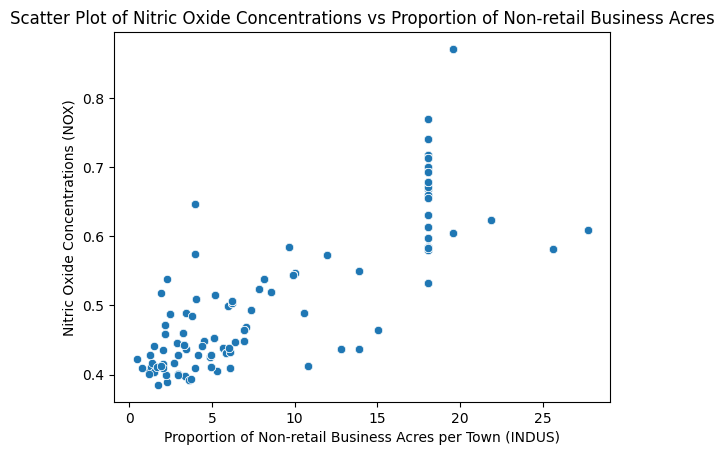

In [12]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-retail Business Acres')
pyplot.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.show()

There is a positive correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). As the proportion of non-retail business acres per town (INDUS) increases, the Nitric oxide concentrations (NOX) tend to increase as well. This is indicated by the points generally trending upwards from the bottom-left to the top-right of the plot. This positive relationship is plausible because non-retail business areas, especially industrial zones, are more likely to be sources of nitric oxide emissions due to industrial activities, traffic, and energy consumption. Areas with a higher proportion of such businesses would logically have higher concentrations of nitric oxide.

#### Create a histogram for the pupil to teacher ratio variable

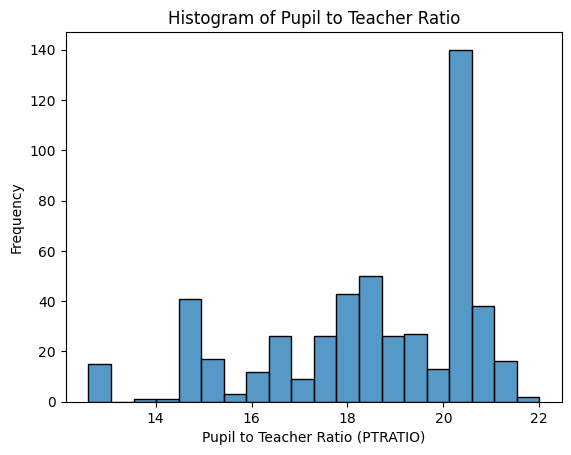

In [13]:
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False)
pyplot.title('Histogram of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio (PTRATIO)')
pyplot.ylabel('Frequency')
pyplot.show()

This histogram shows that the pupil to teacher ratio in this dataset is most frequently around 20-21. The distribution is left-skewed, indicating a tendency towards higher pupil-teacher ratios, with fewer instances of very low ratios. The majority of the data falls within the range of 14 to 22 for the pupil-teacher ratio.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [15]:
# 1. State your hypotheses:
# Null Hypothesis (H0): There is no significant difference in the median value of houses
#                        bounded by the Charles River and houses not bounded by it.
# Alternative Hypothesis (H1): There is a significant difference in the median value of houses
#                             bounded by the Charles River and houses not bounded by it.

# 2. Use α = 0.05 (Significance Level)
alpha = 0.05

# 3. Perform the Test Statistics (Independent samples t-test):
# Separate the MEDV values into two groups based on CHAS variable
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform independent samples t-test
statistic, p_value = scipy.stats.ttest_ind(medv_chas_1, medv_chas_0, equal_var=True) # Assuming equal variances

# 4. Output the results
print(f"T-statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 5. State the conclusion from the test:
if p_value < alpha:
    print("\nConclusion:")
    print("Reject the null hypothesis (H0).")
    print("There is a statistically significant difference in the median value of houses")
    print("bounded by the Charles River and houses not bounded by it at an alpha level of 0.05.")
else:
    print("\nConclusion:")
    print("Fail to reject the null hypothesis (H0).")
    print("There is no statistically significant difference in the median value of houses")
    print("bounded by the Charles River and houses not bounded by it at an alpha level of 0.05.")

T-statistic: 3.9964
P-value: 0.0001

Conclusion:
Reject the null hypothesis (H0).
There is a statistically significant difference in the median value of houses
bounded by the Charles River and houses not bounded by it at an alpha level of 0.05.


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [16]:
# 1. State your hypotheses:
# Null Hypothesis (H0): There is no significant difference in the median value of houses (MEDV)
#                        across different proportions of owner-occupied units built prior to 1940 (AGE) groups.
# Alternative Hypothesis (H1): There is a significant difference in the median value of houses (MEDV)
#                             across different proportions of owner-occupied units built prior to 1940 (AGE) groups.

# 2. Use α = 0.05 (Significance Level)
alpha = 0.05

# 3. Discretize the AGE variable into groups (as in previous example for boxplot)
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

# 4. Perform the Test Statistics (ANOVA):
# Separate the MEDV values into groups based on AGE_Group
medv_group1 = boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV']
medv_group2 = boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV']
medv_group3 = boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']

# Perform ANOVA test
statistic, p_value = scipy.stats.f_oneway(medv_group1, medv_group2, medv_group3)

# 5. Output the results
print(f"F-statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 6. State the conclusion from the test:
if p_value < alpha:
    print("\nConclusion:")
    print("Reject the null hypothesis (H0).")
    print("There is a statistically significant difference in the median value of houses (MEDV)")
    print("across at least one of the proportions of owner-occupied units built prior to 1940 (AGE) groups")
    print(f"at an alpha level of {alpha}.")
else:
    print("\nConclusion:")
    print("Fail to reject the null hypothesis (H0).")
    print("There is no statistically significant difference in the median value of houses (MEDV)")
    print("across the proportions of owner-occupied units built prior to 1940 (AGE) groups")
    print(f"at an alpha level of {alpha}.")

F-statistic: 36.4076
P-value: 0.0000

Conclusion:
Reject the null hypothesis (H0).
There is a statistically significant difference in the median value of houses (MEDV)
across at least one of the proportions of owner-occupied units built prior to 1940 (AGE) groups
at an alpha level of 0.05.


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [18]:
# 1. State your hypotheses:
# Null Hypothesis (H0): There is no linear relationship between Nitric oxide concentrations (NOX)
#                        and the proportion of non-retail business acres per town (INDUS).
# Alternative Hypothesis (H1): There is a linear relationship between Nitric oxide concentrations (NOX)
#                             and the proportion of non-retail business acres per town (INDUS).

# 2. Use α = 0.05 (Significance Level)
alpha = 0.05

# 3. Perform the Test Statistics (Pearson Correlation):
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# 4. Output the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# 5. State the conclusion from the test:
if p_value < alpha:
    print("\nConclusion:")
    print("Reject the null hypothesis (H0).")
    print("There is a statistically significant linear relationship between Nitric oxide concentrations (NOX)")
    print("and the proportion of non-retail business acres per town (INDUS) at an alpha level of 0.05.")
else:
    print("\nConclusion:")
    print("Fail to reject the null hypothesis (H0).")
    print("There is no statistically significant linear relationship between Nitric oxide concentrations (NOX)")
    print("and the proportion of non-retail business acres per town (INDUS) at an alpha level of 0.05.")

Pearson Correlation Coefficient: 0.7637
P-value: 0.0000

Conclusion:
Reject the null hypothesis (H0).
There is a statistically significant linear relationship between Nitric oxide concentrations (NOX)
and the proportion of non-retail business acres per town (INDUS) at an alpha level of 0.05.


#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [19]:
# 1. State your hypotheses:
# Null Hypothesis (H0): There is no statistically significant impact of weighted distance to the five
#                        Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).
#                        In regression terms, the coefficient for DIS is zero.
# Alternative Hypothesis (H1): There is a statistically significant impact of weighted distance to the five
#                             Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).
#                             In regression terms, the coefficient for DIS is not zero.

# 2. Use α = 0.05 (Significance Level)
alpha = 0.05

# 3. Perform the Test Statistics (Regression Analysis):
# Define dependent and independent variables
X = boston_df['DIS'] # Independent variable (weighted distance to employment centres)
y = boston_df['MEDV'] # Dependent variable (median value of owner-occupied homes)

# Add a constant to the independent variable to include intercept in the model
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X)
results = model.fit()

# 4. Output the regression results (specifically p-value for DIS)
print(results.summary())
p_value_DIS = results.pvalues['DIS']
print(f"\nP-value for DIS (weighted distance to employment centres): {p_value_DIS:.4f}")

# 5. State the conclusion from the test:
if p_value_DIS < alpha:
    print("\nConclusion:")
    print("Reject the null hypothesis (H0).")
    print("There is a statistically significant impact of weighted distance to the five Boston employment centres (DIS)")
    print("on the median value of owner-occupied homes (MEDV) at an alpha level of 0.05.")
    print("Based on the regression model, weighted distance to employment centres is a significant predictor of median home value.")
else:
    print("\nConclusion:")
    print("Fail to reject the null hypothesis (H0).")
    print("There is no statistically significant impact of weighted distance to the five Boston employment centres (DIS)")
    print("on the median value of owner-occupied homes (MEDV) at an alpha level of 0.05.")
    print("Based on the regression model, weighted distance to employment centres is not a significant predictor of median home value.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        13:55:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0